In [1]:
#Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset

cards = pd.read_csv("cards_data.csv")

cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [3]:
#Getting a basic overview of the dataset

print("Shape:", cards.shape)
print("\nData types:\n", cards.dtypes)

print("\nInfo:")
cards.info()

Shape: (6146, 13)

Data types:
 id                        int64
client_id                 int64
card_brand               object
card_type                object
card_number               int64
expires                  object
cvv                       int64
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv        

In [4]:
#Checking for missing values

cards.isna().sum()

id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

In [5]:
#

# Removing symbols and converting to numeric
cards["credit_limit"] = cards["credit_limit"].replace(r"[\$,]", "", regex=True)
cards["credit_limit"] = pd.to_numeric(cards["credit_limit"], errors="coerce")

cards["credit_limit"].describe()

count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: credit_limit, dtype: float64

In [6]:
#Separating numeric and categorical columns for summary statistics

numeric_cols = ["credit_limit", "num_cards_issued", "year_pin_last_changed", "cvv"]
print("Numeric columns:", numeric_cols)

print("\nNumeric summary:")
display(cards[numeric_cols].describe())

categorical_cols = ["card_brand", "card_type", "has_chip", "card_on_dark_web"]
print("\nCategorical summary:")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(cards[col].value_counts())

Numeric columns: ['credit_limit', 'num_cards_issued', 'year_pin_last_changed', 'cvv']

Numeric summary:


,credit_limit,num_cards_issued,year_pin_last_changed,cvv
count,6146.000000,6146.000000,6146.000000,6146.000000
mean,14347.493980,1.503091,2013.436707,506.220794
std,12014.463884,0.519191,4.270699,289.431123
min,0.000000,1.000000,2002.000000,0.000000
25%,7042.750000,1.000000,2010.000000,257.000000
50%,12592.500000,1.000000,2013.000000,516.500000
75%,19156.500000,2.000000,2017.000000,756.000000
max,151223.000000,3.000000,2020.000000,999.000000



Categorical summary:

Value counts for card_brand:
card_brand
Mastercard    3209
Visa          2326
Amex           402
Discover       209
Name: count, dtype: int64

Value counts for card_type:
card_type
Debit              3511
Credit             2057
Debit (Prepaid)     578
Name: count, dtype: int64

Value counts for has_chip:
has_chip
YES    5500
NO      646
Name: count, dtype: int64

Value counts for card_on_dark_web:
card_on_dark_web
No    6146
Name: count, dtype: int64


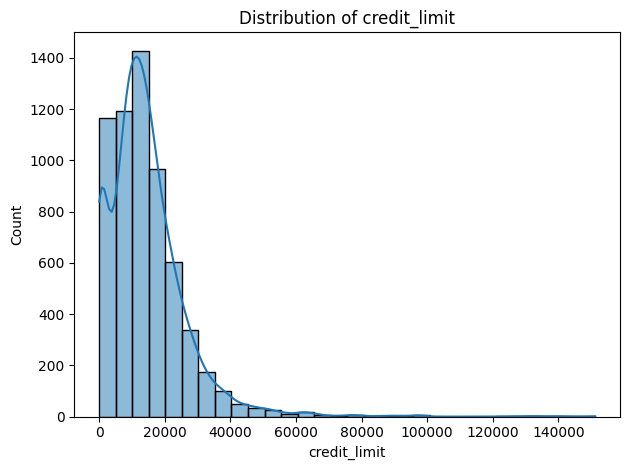

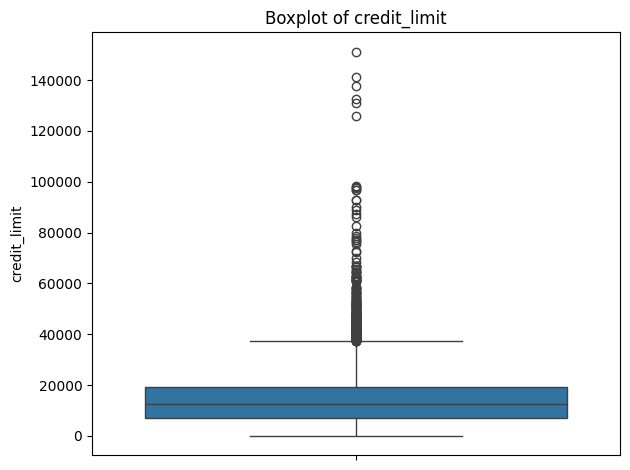

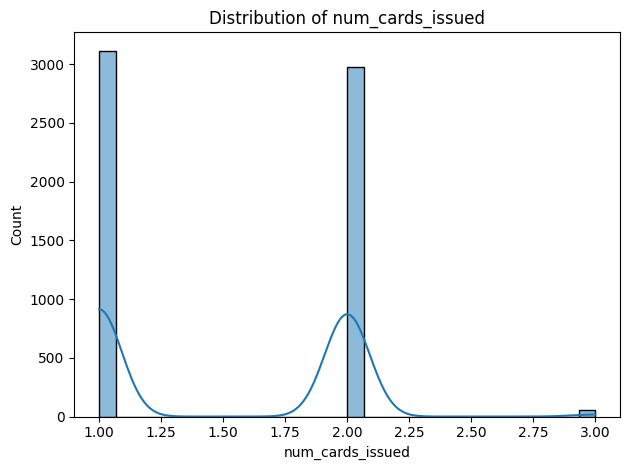

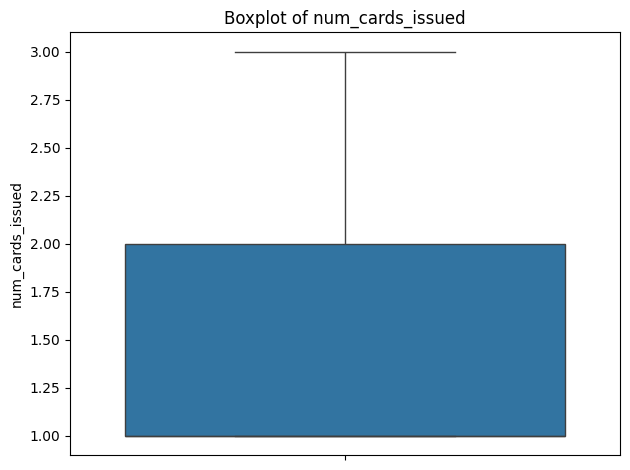

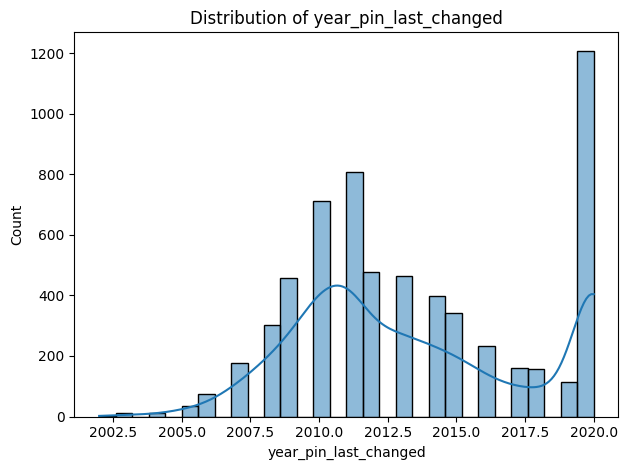

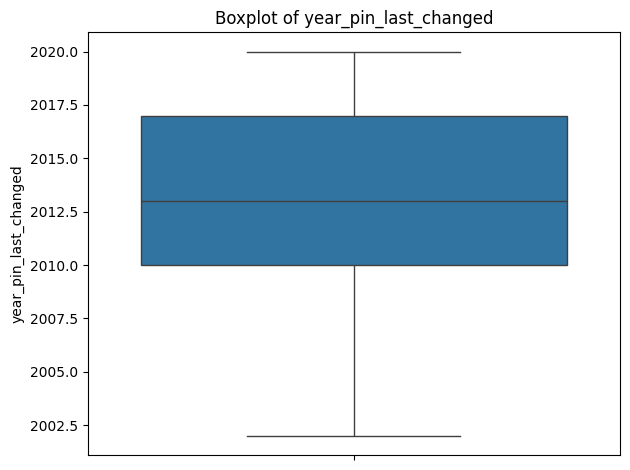

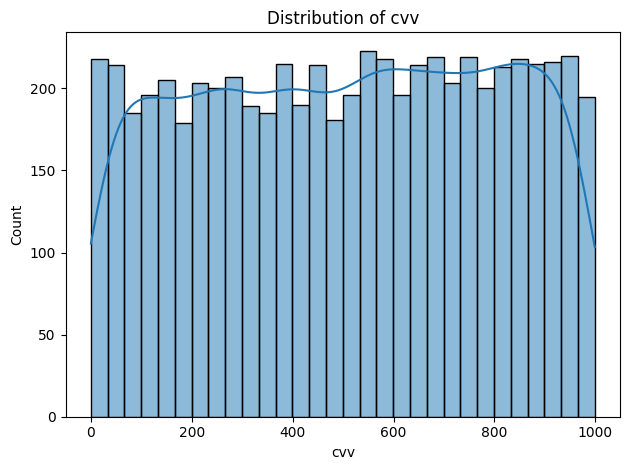

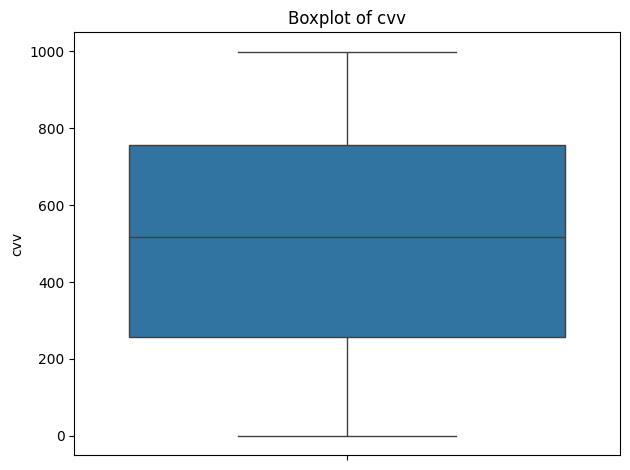

In [7]:
#Creating Histograms and Boxplots for all numeric columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(cards[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure()
    sns.boxplot(y=cards[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

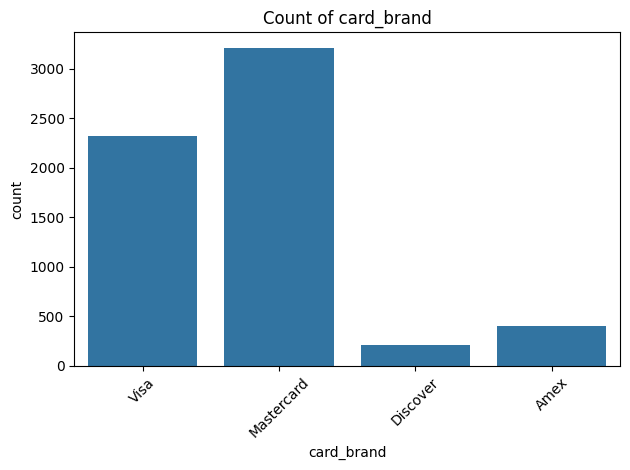

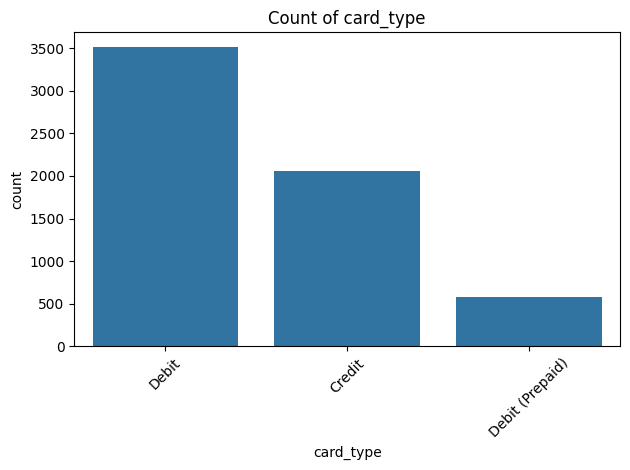

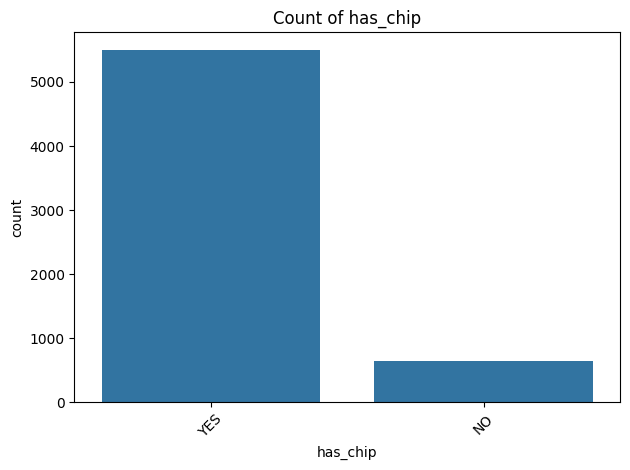

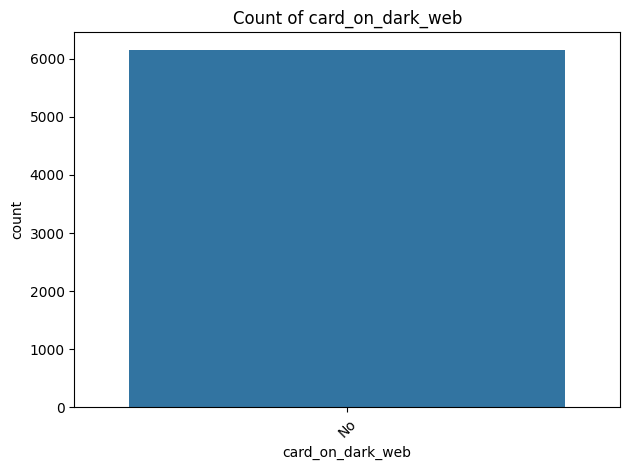

In [8]:
#Creating Countplots for all categorical columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=cards)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

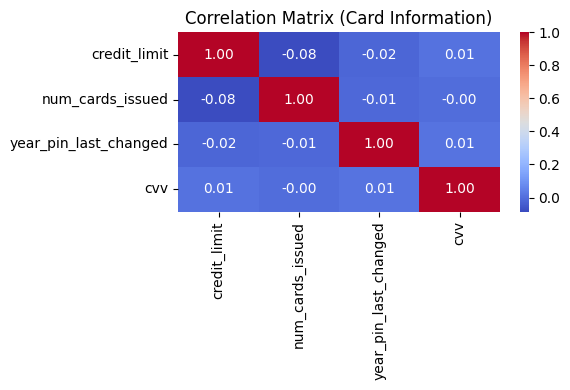

In [9]:
#Correlation matrix for numeric columns

corr = cards[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Card Information)")
plt.tight_layout()
plt.show()

,mean,median,count
card_type,,,
Debit,18557.888636,16454.0,3511
Credit,11174.380165,10100.0,2057
Debit (Prepaid),64.448097,65.0,578


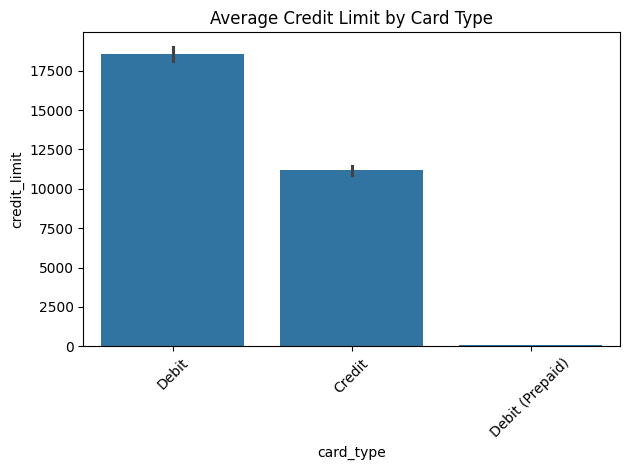

,mean,median,count
card_brand,,,
Visa,14737.334910,12791.5,2326
Mastercard,14659.600187,13013.0,3209
Amex,11436.318408,10250.0,402
Discover,10816.267943,9800.0,209


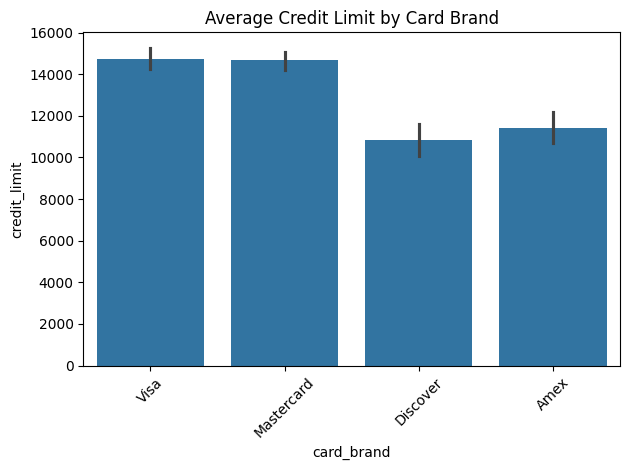

In [10]:
#Analyzing credit limit by card type and brand

group_type = cards.groupby("card_type")["credit_limit"].agg(["mean", "median", "count"]).sort_values("mean", ascending=False)
display(group_type)

plt.figure()
sns.barplot(x="card_type", y="credit_limit", data=cards, estimator=np.mean)
plt.title("Average Credit Limit by Card Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

group_brand = cards.groupby("card_brand")["credit_limit"].agg(["mean", "median", "count"]).sort_values("mean", ascending=False)
display(group_brand)

plt.figure()
sns.barplot(x="card_brand", y="credit_limit", data=cards, estimator=np.mean)
plt.title("Average Credit Limit by Card Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

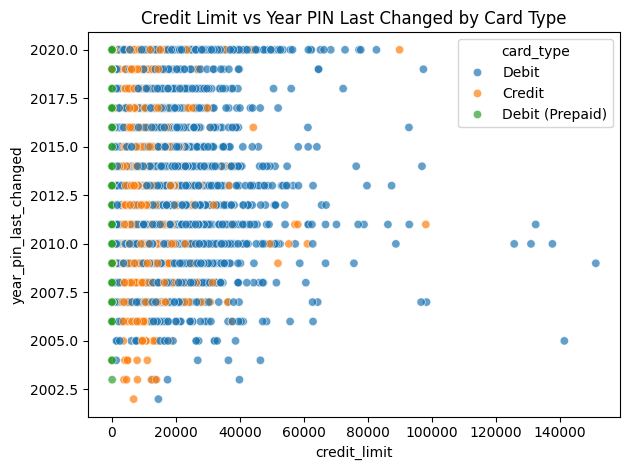

In [11]:
#Card type colored scatter plot (credit_limit vs year_pin_last_changed)

plt.figure()
sns.scatterplot(
    x="credit_limit",
    y="year_pin_last_changed",
    hue="card_type",
    data=cards,
    alpha=0.7
)
plt.title("Credit Limit vs Year PIN Last Changed by Card Type")
plt.tight_layout()
plt.show()